# Evaluation of Models Built Across all Types of Models:

This notebook evaluates all the models built across the 3 types of modelling:
* LogisticRegression ("logit")
* RandomForestClassifier ("rfc")
* XGBoostClassifier ("xgb")

### What is done in this notebook:
* Evaluate all models built against performance scores for classifiers
* Compare the "best" models from each model type
* Examine Feature Importances on the best (XGB) model overall
* Discuss what was learned about treatment of input data

In [9]:
from modules.utility import Utility
from IPython.display import display
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis # Viridis color map for plots

#import pickle

In [10]:
# # Uncomment code as required to force reload utility.py
# # Was only required during development of this notebook

# from importlib import reload
# import modules.utility
# reload(modules.utility)
# from modules.utility import Utility

# Setup

Remove display limits for column and row lengths, for easier viewing of dataframes

In [11]:
# Set no limits for number of columns and rows to display
# Utility.reset_display_max_cols_rows() to reset
Utility.setup_display_max_cols_rows()

Load the 3 df_compare results

In [12]:
# Set the relative path from the current notebook to the output folder
outputrelativepath = Utility.OUTPUT_RELATIVE_PATH

# Set the filenames for each of the "compare df" files
logit_compare_filename = 'logit_compare_model_scores.csv'
rfc_compare_filename = 'rfc_compare_model_scores.csv'
xgb_compare_filename = 'xgb_compare_model_scores.csv'

# Load the compare csv files into dataframes
logit = pd.read_csv(outputrelativepath + logit_compare_filename)
rfc = pd.read_csv(outputrelativepath + rfc_compare_filename)
xgb = pd.read_csv(outputrelativepath + xgb_compare_filename)

In [13]:
# Rename the first column to 'score' for each dataframe

logit.rename(columns={'Unnamed: 0': 'score'}, inplace=True)
rfc.rename(columns={'Unnamed: 0': 'score'}, inplace=True)
xgb.rename(columns={'Unnamed: 0': 'score'}, inplace=True)

In [14]:
# Let's see what each of the dfs look like

display(logit)
display(rfc)
display(xgb)

,score,baseline_train,baseline_test,balanced_train,balanced_test,hourint_train,hourint_test,simplify_train,simplify_test,gridbest_train,gridbest_test
0,accuracy,0.93,0.93,0.78,0.83,0.78,0.83,0.73,0.82,0.79,0.86
1,precision,0.57,0.62,0.68,0.23,0.68,0.23,0.62,0.19,0.66,0.25
2,recall,0.00,0.00,0.66,0.63,0.66,0.63,0.51,0.48,0.58,0.54
3,f1,0.01,0.01,0.67,0.34,0.67,0.34,0.56,0.27,0.62,0.34
4,f1_macro,0.49,0.49,0.76,0.62,0.76,0.62,0.69,0.59,0.74,0.63
5,f1_weighted,0.90,0.90,0.78,0.86,0.78,0.86,0.73,0.86,0.79,0.88
6,roc_auc,0.50,0.50,0.75,0.74,0.75,0.74,0.68,0.66,0.73,0.71


,score,baseline_train,baseline_test,onehot_train,onehot_test,onehot_dropdayperiod_train,onehot_dropdayperiod_test,labelencoded_train,labelencoded_test,labelpartial_train,labelpartial_test
0,accuracy,0.99,0.93,0.99,0.93,0.99,0.92,0.99,0.93,0.99,0.93
1,precision,0.84,0.45,0.84,0.45,0.84,0.42,0.84,0.48,0.84,0.45
2,recall,1.00,0.36,1.00,0.36,1.00,0.33,1.00,0.36,1.00,0.36
3,f1,0.91,0.40,0.91,0.40,0.92,0.37,0.91,0.41,0.91,0.40
4,f1_macro,0.95,0.68,0.95,0.68,0.95,0.66,0.95,0.69,0.95,0.68
5,f1_weighted,0.99,0.92,0.99,0.92,0.99,0.92,0.99,0.92,0.99,0.92
6,roc_auc,0.99,0.66,0.99,0.66,0.99,0.65,0.99,0.66,0.99,0.66


,score,baseline_train,baseline_test,onehot_train,onehot_test,onehot_dropdayperiod_train,onehot_dropdayperiod_test,labelencoded_train,labelencoded_test,labelpartial_train,labelpartial_test,labelpartialsmote_train,labelpartialsmote_test,baselinesmote_train,baselinesmote_test,gridbest2_train,gridbest2_test,gridbest3_train,gridbest3_test
0,accuracy,0.90,0.88,0.85,0.84,0.84,0.83,0.87,0.86,0.87,0.86,0.89,0.89,0.92,0.89,0.91,0.87,0.90,0.87
1,precision,0.39,0.35,0.30,0.29,0.28,0.27,0.34,0.32,0.33,0.32,0.83,0.37,0.86,0.38,0.80,0.33,0.80,0.33
2,recall,0.98,0.85,0.94,0.88,0.93,0.88,0.95,0.89,0.94,0.90,0.86,0.79,0.91,0.78,0.96,0.89,0.92,0.85
3,f1,0.56,0.49,0.46,0.44,0.43,0.42,0.50,0.47,0.49,0.47,0.84,0.50,0.88,0.51,0.88,0.48,0.86,0.48
4,f1_macro,0.75,0.71,0.68,0.67,0.67,0.66,0.71,0.70,0.71,0.70,0.88,0.72,0.91,0.72,0.90,0.70,0.89,0.70
5,f1_weighted,0.92,0.90,0.88,0.88,0.87,0.87,0.90,0.89,0.89,0.89,0.89,0.91,0.92,0.91,0.91,0.89,0.90,0.90
6,roc_auc,0.94,0.87,0.89,0.86,0.88,0.85,0.91,0.88,0.90,0.88,0.88,0.84,0.92,0.84,0.92,0.88,0.90,0.86


# Evaluate performance of all models to this point (6 models)

In [15]:
# Setup the row number for each score type

accuracy = 0
precision = 1
recall = 2
f1 = 3
f1_macro = 4
f1_weighted = 5
roc_auc = 6

In [16]:
# Setup the column names for test models for each model type

# Create a list comprehension to fill `logit_test_cols` with its column names that end with the text '_test'
logit_test_cols = logit.columns[[colname.endswith('_test') for colname in logit.columns]]

# Create a list comprehension to fill `rfc_test_cols` with its column names that end with the text '_test'
rfc_test_cols = rfc.columns[[colname.endswith('_test') for colname in rfc.columns]]

# Create a list comprehension to fill `xgb_test_cols` with its column names that end with the text '_test'
xgb_test_cols = xgb.columns[[colname.endswith('_test') for colname in xgb.columns]]

display(logit_test_cols)
display(rfc_test_cols)
display(xgb_test_cols)

Index(['baseline_test', 'balanced_test', 'hourint_test', 'simplify_test',
       'gridbest_test'],
      dtype='object')

Index(['baseline_test', 'onehot_test', 'onehot_dropdayperiod_test',
       'labelencoded_test', 'labelpartial_test'],
      dtype='object')

Index(['baseline_test', 'onehot_test', 'onehot_dropdayperiod_test',
       'labelencoded_test', 'labelpartial_test', 'labelpartialsmote_test',
       'baselinesmote_test', 'gridbest2_test', 'gridbest3_test'],
      dtype='object')

# Plot scores per model type (Logistic Regression, Random Forest Classifier, XGBoost Classifier)

In [17]:
# # Plotting Sample - commented out because replaced with better graphs below

# # Plot Logit models - Accuracy Scores
# logit.iloc[accuracy][logit_test_cols].plot(kind='bar', color='blue', label='logit')
# plt.show()

# # Plot RFC models - Accuracy Scores
# rfc.iloc[accuracy][rfc_test_cols].plot(kind='bar', color='red', label='rfc')
# plt.show()

# # Plot XGB models - Accuracy Scores
# xgb.iloc[accuracy][xgb_test_cols].plot(kind='bar', color='green', label='xgb')
# plt.show()

## Plot all model performances (on test data only) 

Define a local function to help plot the bar charts across all score types

In [20]:
# Define function that plots the scores for each model type for a given score type

def makeplots_across_logit_rfc_xgb(row_loc, score_name):
    # Define the Viridis colors
    viridis_colors = [viridis(0.2), viridis(0.5), viridis(0.8)]

    plt.style.use('seaborn-v0_8-whitegrid')

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

    # Adjust the spacing between subplots
    fig.subplots_adjust(wspace=0.2)

    # Set bar width
    bar_width = 0.4

    # Plot logit bars
    ax[0].bar(logit_test_cols, logit.iloc[row_loc][logit_test_cols], color=viridis_colors[0])
    ax[0].set_title('logit')
    ax[0].tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotate and adjust font size for x-axis labels
    ax[0].set_ylabel(f"{score_name} Score", rotation=90, fontsize=10)

    # Plot rfc bars
    ax[1].bar(rfc_test_cols, rfc.iloc[row_loc][rfc_test_cols], color=viridis_colors[1])
    ax[1].set_title('rfc')
    ax[1].tick_params(axis='x', labelrotation=45, labelsize=8)

    # Plot xgb bars
    ax[2].bar(xgb_test_cols, xgb.iloc[row_loc][xgb_test_cols], color=viridis_colors[2])
    ax[2].set_title('xgb')
    ax[2].tick_params(axis='x', labelrotation=45, labelsize=8)

    # Set overall title
    fig.suptitle(f'Comparison of {score_name} Scores on Models using Test Data', fontsize=16)

    # Show the plot
    plt.show()


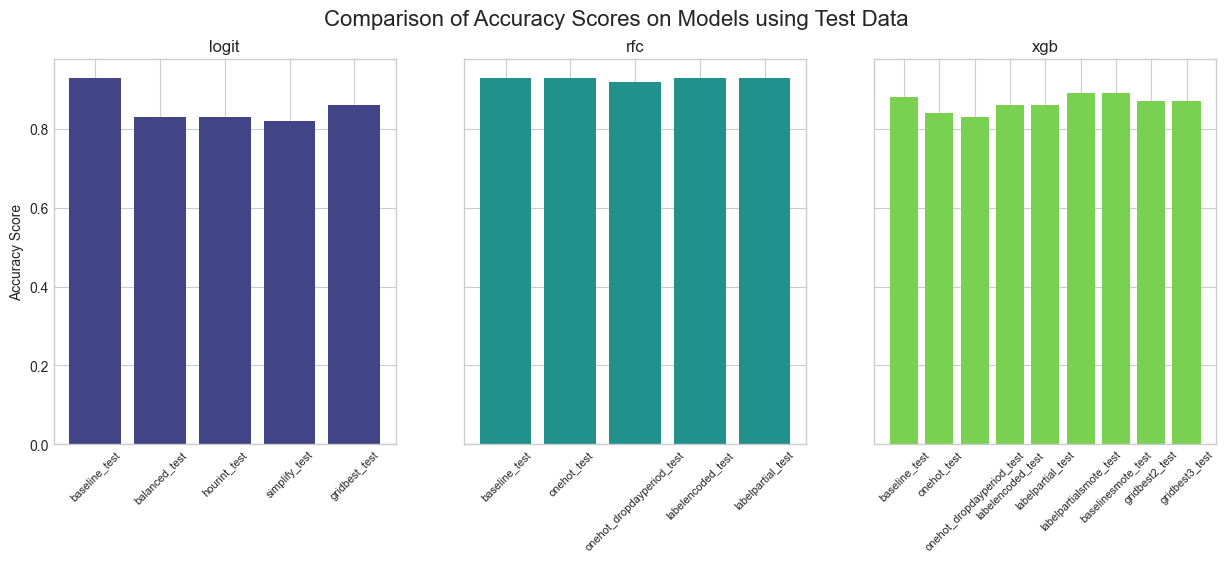

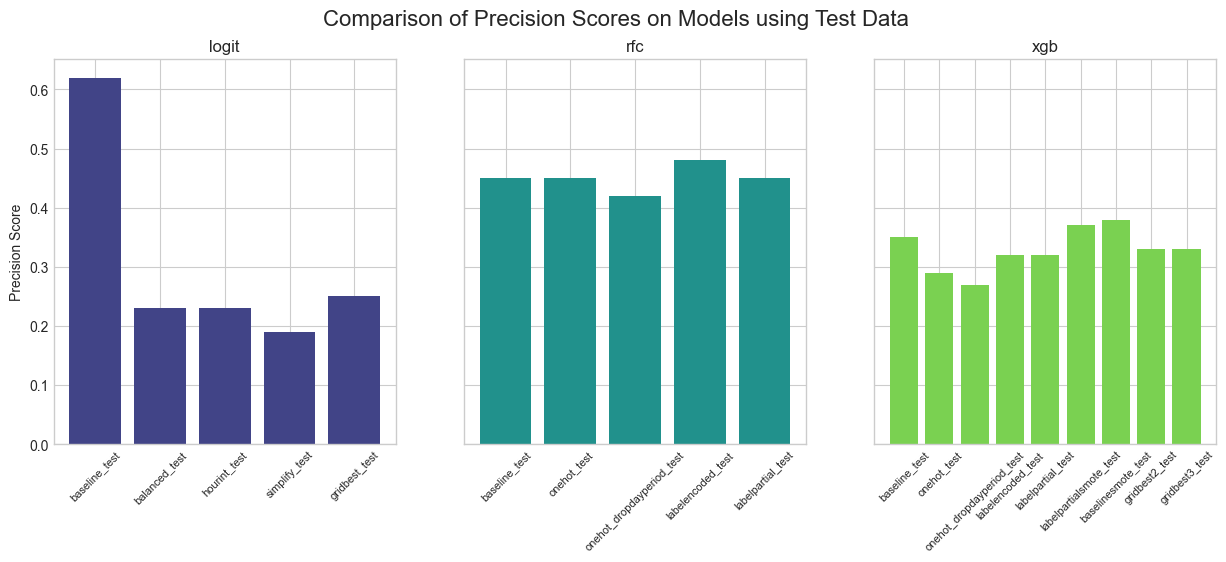

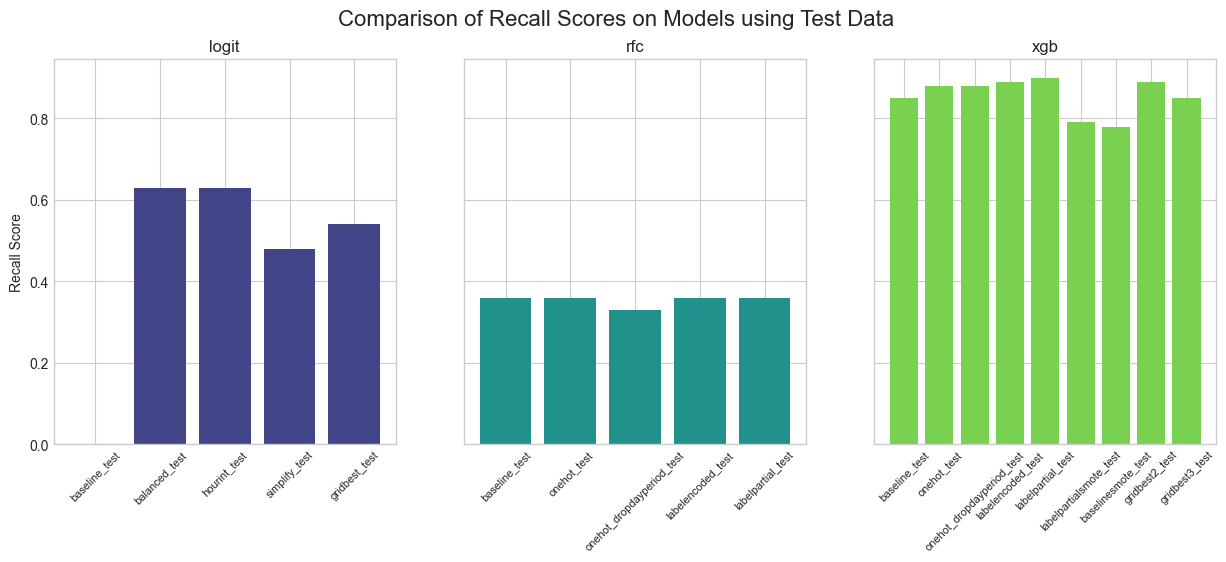

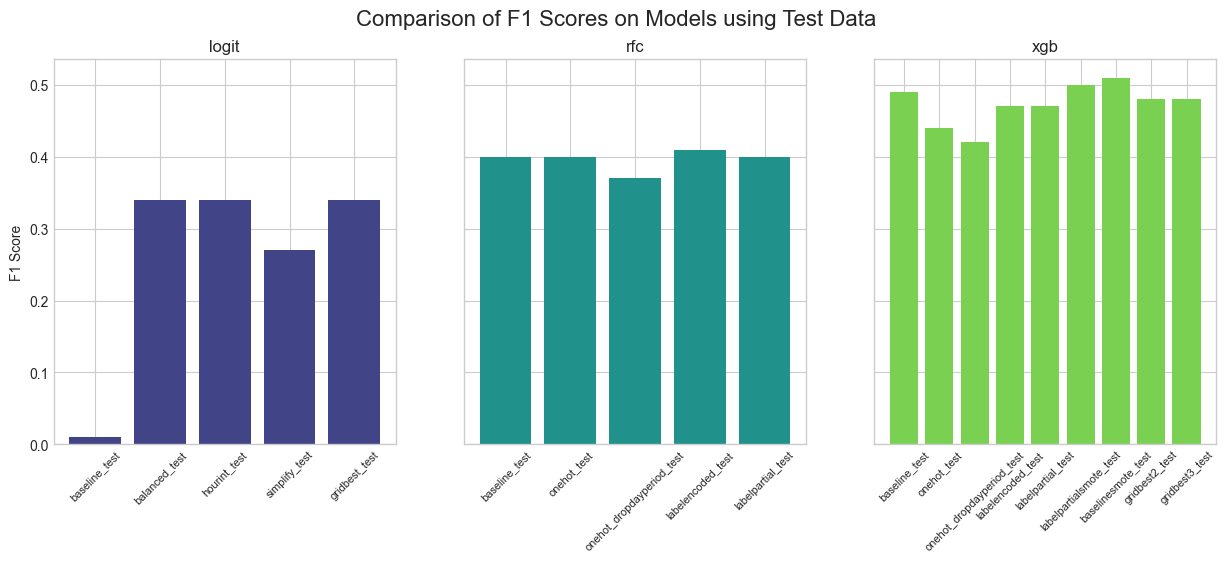

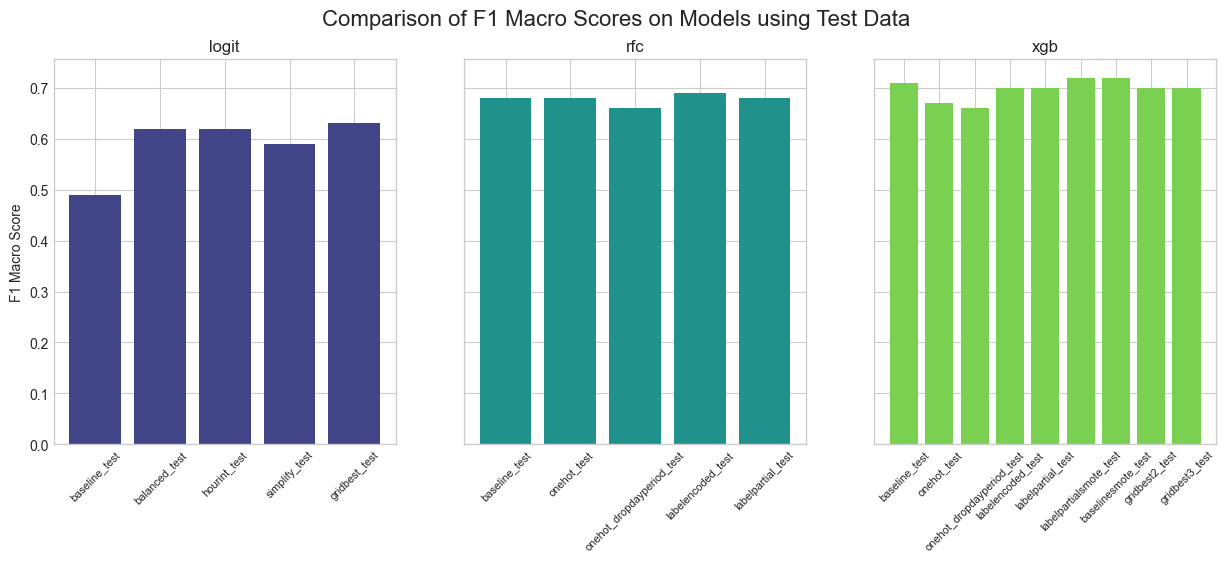

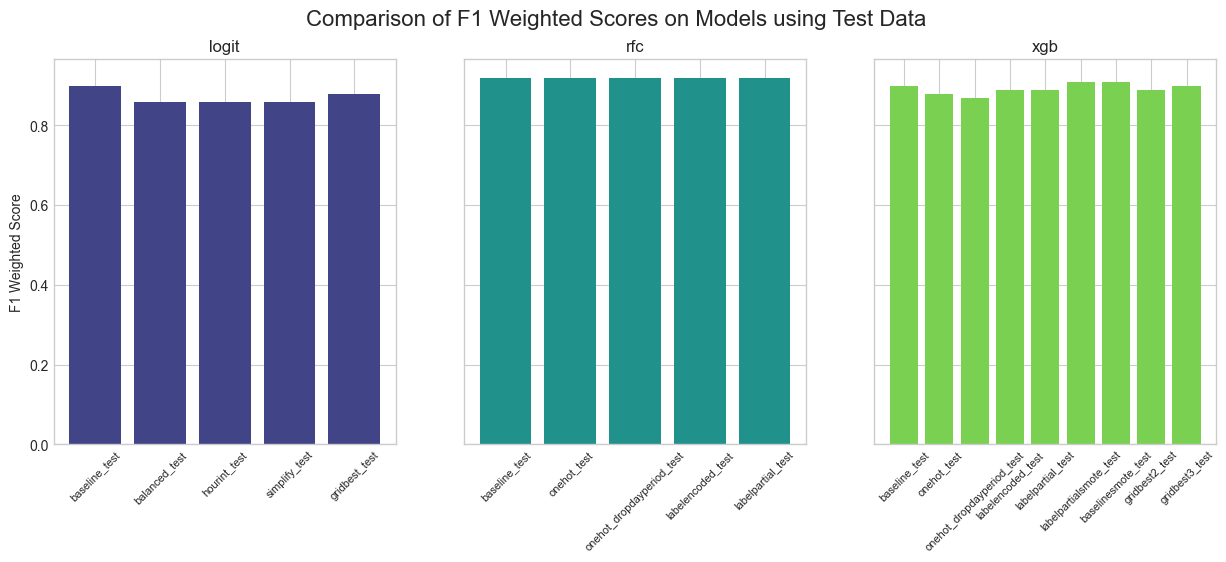

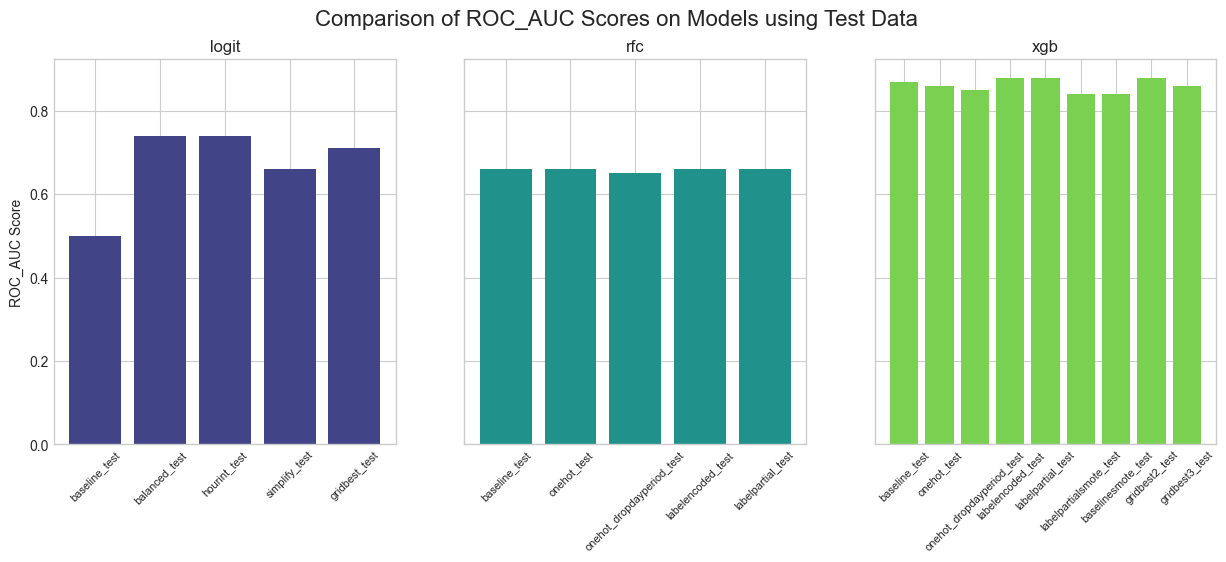

In [21]:
# Recall that the scores are associated to the following indices (rown numbers) in each of the dfs:

# Recall:
# accuracy = 0
# precision = 1
# recall = 2
# f1 = 3
# f1_macro = 4
# f1_weighted = 5
# roc_auc = 6

scores = ['Accuracy', 'Precision', 'Recall', 'F1', 'F1 Macro', 'F1 Weighted', 'ROC_AUC']
for index, scorename in enumerate(scores):
    makeplots_across_logit_rfc_xgb(index, scorename)

# Compare the best models from each "class" of model (Logit, RFC, XGB)

In [24]:
# Create 3 dfs with test data score values for best models in each "class" of model
logit_best = logit[['score', 'gridbest_test']].copy()
rfc_best = rfc[['score', 'labelencoded_test']].copy()
xgb_best = xgb[['score', 'baselinesmote_test', 'gridbest2_test']].copy()

# Rename the columns to make it clear which "class" of model it belongs to
logit_best.rename(columns={'gridbest_test': 'logit_best'}, inplace=True)
rfc_best.rename(columns={'labelencoded_test': 'rfc_best'}, inplace=True)
xgb_best.rename(columns={'baselinesmote_test': 'xgb_best1 (precision)', 'gridbest2_test': 'xgb_best2 (recall)'}, inplace=True)

# Display each of the "class" of model best DFs
display(logit_best)
display(rfc_best)
display(xgb_best)

# Merge the 3 into one "df_best" dataframe so we can plot easily
#df_best = logit_best.merge(rfc_best, on='score', how='outer', suffixes=['_logit', '_rfc']).merge(xgb_best, on='score', how='outer', suffixes=['_rfc', '_xgb'])
df_best = logit_best.merge(rfc_best, on='score', how='outer').merge(xgb_best, on='score', how='outer')
df_best


,score,logit_best
0,accuracy,0.86
1,precision,0.25
2,recall,0.54
3,f1,0.34
4,f1_macro,0.63
5,f1_weighted,0.88
6,roc_auc,0.71


,score,rfc_best
0,accuracy,0.93
1,precision,0.48
2,recall,0.36
3,f1,0.41
4,f1_macro,0.69
5,f1_weighted,0.92
6,roc_auc,0.66


,score,xgb_best1 (precision),xgb_best2 (recall)
0,accuracy,0.89,0.87
1,precision,0.38,0.33
2,recall,0.78,0.89
3,f1,0.51,0.48
4,f1_macro,0.72,0.70
5,f1_weighted,0.91,0.89
6,roc_auc,0.84,0.88


,score,logit_best,rfc_best,xgb_best1 (precision),xgb_best2 (recall)
0,accuracy,0.86,0.93,0.89,0.87
1,precision,0.25,0.48,0.38,0.33
2,recall,0.54,0.36,0.78,0.89
3,f1,0.34,0.41,0.51,0.48
4,f1_macro,0.63,0.69,0.72,0.70
5,f1_weighted,0.88,0.92,0.91,0.89
6,roc_auc,0.71,0.66,0.84,0.88


# Plot of the Best Models from each "Class of Model", per Score Type

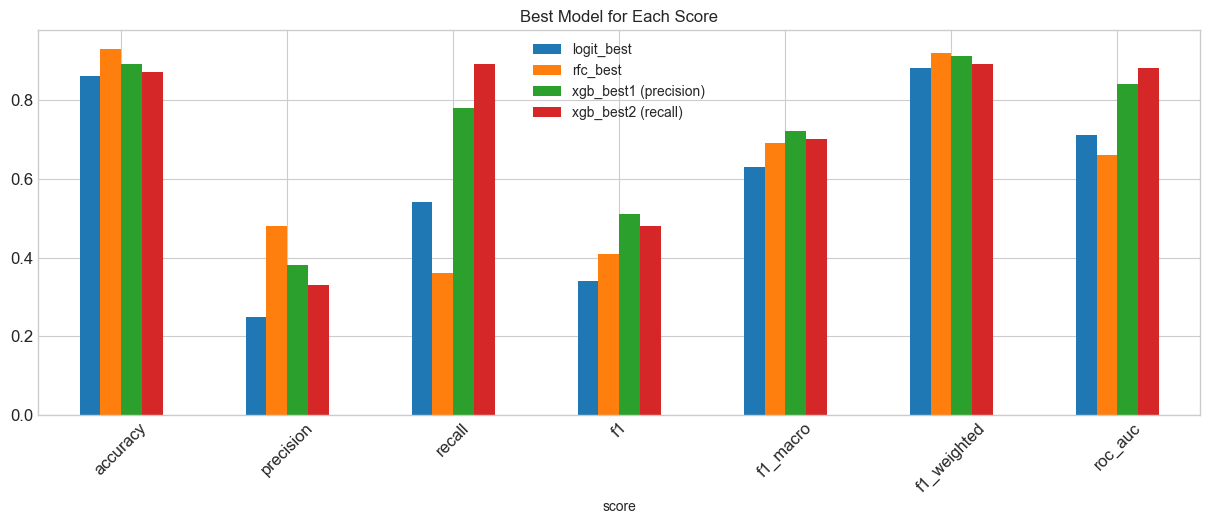

In [26]:
# Plot the best models for each score type
df_best.plot(kind='bar', x='score', figsize=(15, 5), rot=45, fontsize=12, title='Best Model for Each Score');

# Summary of Findings

### Which is the Best "Class of Model" Overall?
* Not surprisingly, XGBoost gave a better overall performance on a number of classification model scores.
* Since we had imbalanced data, even after putting it through SMOTE and RandomUnderSampler, the F1 Macro score is a better indication of model performance.
* Tuning hyperparameters using GridSearchCV using a scorer of `f1_macro` returned an tuned XGBoost model with the 2nd best F1 Macro score of all trained models (the 1st best was also an XGBoost model), but with a higher relative Recall gain than the Precision score loss.
* The RFC GridSearchCV went through 4 different attempts (2 using GPUs) to train.  The various platforms either ran out of memory or did not return in a reasonable time.
    * The final Run (#4) was only fitting 2100 total fits, but was stopped at 11 hours.
    * Learning: RFC models require a lot of memory and/ot storage and perhaps a RandomizedSearch is the best approach for the RFC.
* Moving from basic LogisticRegression to RandomForest and then to XGBoost saw immediate improvements even with the "baseline", default parameters for each of the classifiers.
* The way you treat data the incoming data is important and sometimes significantly changes the performance of the outcoming model.
    * This indicates a need for further research on proper ways to encoding data (label, ordinal, one-hot, pd.category dtype) for each model so not as much time is spent working with different data treatments before putting the data into the models.

### What is the Best Model Overall?
* It was the model resulting from the 2nd GridSearch run on XGBoost.

### What is the Best Way to Treat the Incoming Data?
* The way the data was prepared for the best XGBoost model was:
    * One-Hot Encode Partially: Turn all categorical columns into one-hot encoded columns with the exception of 'hour' and 'weekofyear', in order to reduce dimensionality
        * 'dayofweek'
        * 'dayperiod' ('night', 'day', 'evening')
        * 'hospital id'
        * 'city'
        * 'citytype'
    * Label Encode 2 columns: Turn the 'hour' and 'weekofyear' columns into Label Encoding.  This would give a numerical value for each of the possible 'hour' (24 of them) and 'weekofyear' (52 of them).
    * Fix Class Imbalance: The data, which began imbalanced with 93.3% as Class '0' and 6.7# as Class '1', was put through a SMOTE (sampling strategy=0.1) and RandomUnderSampler (samping strategy=0.5) to bring the proportions to 66.67% as Class '0' and 33.33% as Class '1'.



## Feature Importances

For the best model, the plot of feature importances (using importance type of "gain") is shown below.

<img src=../output/figures/gain_feat_imp_xgb_gridbest2.png></img>

It would appear that a significant indicator of 'longwait' or not is some combination of:
* specific hospital
* rural vs. urgban hospitals
* dayperiod (with night, or hours between 00h00 and 07h59, being significant)